### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### Reading the data

The excel file 'Data - SM Maruti suzuki.xlsx' contains the sales dataset for the past two years. 

The csv file 'cars_ds_final_2021.csv' consist of the car details such as __price, displacement, carb length, etc__ of all the car manufacturers in India.

We need to filter out the Maruti Suzuki details from the car details dataset and merge them with the sales dataset.

In [2]:
sales_df = pd.read_excel('DATA - SM Maruti suzuki.xlsx', parse_dates=True)

In [3]:
sales_df.head()

,Region,Dealer Name,Invoice Date,Invoice Num,Status,Model Name,Fuel,Variant Name,Color
0,S1,S M CAR PRIVATE LIMITED,2019-04-03,VSL/19000001,I,EECO,PETROL,MARUTI EECO 5 SEATER WITH AC,METALLIC GLISTENIG GREY
1,S1,S M CAR PRIVATE LIMITED,2019-04-11,VSL/19000002,I,SUPER CARRY,DIESEL,MARUTI SUPER CARRY DIESEL STD.,SILKY SILVER
2,S1,S M CAR PRIVATE LIMITED,2019-04-19,VSL/19000003,I,SUPER CARRY,DIESEL,MARUTI SUPER CARRY DIESEL STD.,SILKY SILVER
3,S1,S M CAR PRIVATE LIMITED,2019-04-27,VSL/19000005,I,SUPER CARRY,DIESEL,MARUTI SUPER CARRY DIESEL STD.,SILKY SILVER
4,S1,S M CAR PRIVATE LIMITED,2019-04-27,VSL/19000006,I,EECO,PETROL,MARUTI EECO 5 SEATER WITH AC,METALLIC GLISTENIG GREY


In [4]:
car_details_df = pd.read_csv('cars_ds_final_2021.csv',index_col='Unnamed: 0')

In [5]:
car_details_df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
maruti_details_df = car_details_df[car_details_df['Make'].fillna('Others').str.contains('Maruti')]

In [7]:
maruti_details_df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
24,Maruti Suzuki,Eeco,5 Str,"Rs. 3,52,136",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Maruti Suzuki,Eeco,7 Str,"Rs. 3,80,573",1196 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,Maruti Suzuki,Eeco,5 Str With Ac+Htr,"Rs. 3,92,967",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,Maruti Suzuki,Eeco,5 Str With Ac+Htr Cng,"Rs. 4,66,057",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Maruti Suzuki,Eeco,5 Str With Htr Cng,"Rs. 4,25,255",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__sales_df__ has the sales dataset and __maruti_details_df__ consist of the details of the Maruti Suzuki manufactured cars.

Now, let's clean the datasets before we merge them together.

### Cleaning the dataset

By looking the first few rows, we can estimate that a whole lot of columns are completely blank. So let's remove those columns.

In [8]:
# Droping all the columns that are blank
maruti_details_df = maruti_details_df.dropna(axis=1)
maruti_details_df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Odometer,Speedometer,Tachometer,Seating_Capacity,Seats_Material,Type,Cup_Holders,Fuel_Gauge,Handbrake,Instrument_Console
24,Maruti Suzuki,Eeco,5 Str,"Rs. 3,52,136",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Manual,Analog + Digital
25,Maruti Suzuki,Eeco,7 Str,"Rs. 3,80,573",1196 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,Digital,Analog,Not on offer,7.0,Fabric,Manual,Not on offer,Digital,Manual,Analog + Digital
26,Maruti Suzuki,Eeco,5 Str With Ac+Htr,"Rs. 3,92,967",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Manual,Analog + Digital
27,Maruti Suzuki,Eeco,5 Str With Ac+Htr Cng,"Rs. 4,66,057",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Manual,Analog + Digital
28,Maruti Suzuki,Eeco,5 Str With Htr Cng,"Rs. 4,25,255",1196 cc,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,...,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Manual,Analog + Digital


Now let's see if any column is completely filled with a single value.

In [9]:
maruti_details_df.describe(include='object').loc['unique']

Make                        2
Model                      22
Variant                   113
Ex-Showroom_Price         161
Displacement                8
Drivetrain                  3
Cylinder_Configuration      1
Emission_Norm               3
Engine_Location             2
Fuel_System                 1
Fuel_Tank_Capacity         11
Fuel_Type                   4
Height                     20
Length                     20
Width                      16
Body_Type                   6
Front_Brakes                2
Rear_Brakes                 3
Front_Suspension           13
Rear_Suspension            14
Power                      26
Torque                     19
Odometer                    3
Speedometer                 3
Tachometer                  5
Seats_Material              2
Type                        3
Cup_Holders                 4
Fuel_Gauge                  2
Handbrake                   1
Instrument_Console          3
Name: unique, dtype: object

In [10]:
maruti_details_df[['Cylinder_Configuration','Fuel_System','Handbrake']].describe()

,Cylinder_Configuration,Fuel_System,Handbrake
count,163,163,163
unique,1,1,1
top,In-line,Injection,Manual
freq,163,163,163


The columns *Cylinder_Configuration, Fuel_System and Handbrake* has unique values, being *in-line, injection and manual* respectively. Let's drop them from the df.

In [11]:
maruti_details_df.drop(['Cylinder_Configuration','Fuel_System','Handbrake'], axis=1, inplace=True)

Now that we have removed the columns, let's do some string manupulation on the numeric data like ex-showroom price, displacement  and convert their datatype to be an integer.

In [12]:
maruti_details_df['Ex-Showroom_Price']=maruti_details_df['Ex-Showroom_Price'].str.split(' ').apply(lambda x: x[1]).str.replace(',','').astype('int32')

maruti_details_df['Displacement']=maruti_details_df['Displacement'].str.split(' ').apply(lambda x: x[0]).astype('int32')

maruti_details_df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Emission_Norm,Engine_Location,...,Torque,Odometer,Speedometer,Tachometer,Seating_Capacity,Seats_Material,Type,Cup_Holders,Fuel_Gauge,Instrument_Console
24,Maruti Suzuki,Eeco,5 Str,352136,1196,4.0,4.0,RWD (Rear Wheel Drive),BS 6,"Front, Longitudinal",...,101Nm@3000rpm,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Analog + Digital
25,Maruti Suzuki,Eeco,7 Str,380573,1196,4.0,4.0,FWD (Front Wheel Drive),BS 6,"Front, Longitudinal",...,101Nm@3000rpm,Digital,Analog,Not on offer,7.0,Fabric,Manual,Not on offer,Digital,Analog + Digital
26,Maruti Suzuki,Eeco,5 Str With Ac+Htr,392967,1196,4.0,4.0,RWD (Rear Wheel Drive),BS 6,"Front, Longitudinal",...,101Nm@3000rpm,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Analog + Digital
27,Maruti Suzuki,Eeco,5 Str With Ac+Htr Cng,466057,1196,4.0,4.0,RWD (Rear Wheel Drive),BS 6,"Front, Longitudinal",...,85Nm@3000rpm,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Analog + Digital
28,Maruti Suzuki,Eeco,5 Str With Htr Cng,425255,1196,4.0,4.0,RWD (Rear Wheel Drive),BS 6,"Front, Longitudinal",...,85Nm@3000rpm,Digital,Analog,Not on offer,5.0,Fabric,Manual,Not on offer,Digital,Analog + Digital


In [13]:
maruti_details_df.iloc[0]

Make                            Maruti Suzuki
Model                                    Eeco
Variant                                 5 Str
Ex-Showroom_Price                      352136
Displacement                             1196
Cylinders                                 4.0
Valves_Per_Cylinder                       4.0
Drivetrain             RWD (Rear Wheel Drive)
Emission_Norm                            BS 6
Engine_Location           Front, Longitudinal
Fuel_Tank_Capacity                  40 litres
Fuel_Type                              Petrol
Height                                1800 mm
Length                                3675 mm
Width                                 1475 mm
Body_Type                                 MPV
Doors                                     5.0
Front_Brakes                  Ventilated Disc
Rear_Brakes                              Drum
Front_Suspension             McPherson struts
Rear_Suspension                  3 Link Rigid
Power                            7

After a detailed look at all the entries of a row, we can identify that, the columns Fuel_Tank_Capacity, Height, Length, Width has similar problem as above. 

So, let's split them and convert them into numeric datatype.

In [14]:
maruti_details_df[['Fuel_Tank_Capacity','Height','Length','Width']] = maruti_details_df[['Fuel_Tank_Capacity','Height','Length','Width']].apply(lambda x: x.str.split(' ').apply(lambda y: y[0]).astype('int64'))

So, let's make ***power, rpm*** and ***torque, rpm*** into seperate columns.

In [15]:
maruti_details_df[['Power PS','PS RPM']] = maruti_details_df['Power'].str.split('@', expand = True)

maruti_details_df[['Torque Nm','Nm RPM']] = maruti_details_df['Torque'].str.split('@', expand = True)

print(maruti_details_df[['Power PS','PS RPM','Torque Nm','Nm RPM']].apply(lambda x: x.nunique()))

maruti_details_df[['Power PS','PS RPM','Torque Nm','Nm RPM']].head()

Power PS     24
PS RPM        8
Torque Nm    18
Nm RPM       12
dtype: int64


,Power PS,PS RPM,Torque Nm,Nm RPM
24,73PS,6000rpm,101Nm,3000rpm
25,74PS,6000RPM,101Nm,3000rpm
26,73PS,6000rpm,101Nm,3000rpm
27,62PS,6000rpm,85Nm,3000rpm
28,62PS,6000rpm,85Nm,3000rpm


In [16]:
maruti_details_df[['Power PS', 'PS RPM', 'Torque Nm', 'Nm RPM']].apply(lambda x: x.str.lower().str[-3:].unique())

Power PS     [3ps, 4ps, 2ps, 8ps, 9ps, bhp, 5ps, 0ps, 7hp, ...
PS RPM                                                   [rpm]
Torque Nm                  [1nm, 5nm, 0nm, 8nm, 3nm, 9nm,  nm]
Nm RPM                                                   [rpm]
dtype: object

Only Power has values in ps, bhp and hp. Let's look into the conversion factor:

$$ 1 bhp = 1 hp =  1.0139 ps $$

Since all the values are almost equal, let's consider everything to be in ps.

In [17]:
maruti_details_df['Power PS'].unique()

array(['73PS', '74PS', '62PS', '68PS', '59PS', '59bhp', '83PS', '75PS',
       '69bhp', '84.3PS', '90PS', '104PS', '48PS', '47hp', '67PS', '80PS',
       '103Bhp', '104bhp', '95Bhp', '102PS', '34.7PS', '83 Bhp', '89Bhp',
       '94Bhp'], dtype=object)

Let's import regex and define a function, that will seperate the numeric value and alphabetical value in the string,
so that we can get rid of ps, bhp, rpm, nm, etc., and convert the columns to be numeric

In [18]:
import re

def num_split(text):
    r = re.compile("([0-9.-]+)([a-zA-Z ]+)")
    num = r.match(text).group(1)
    return num.split('-')[-1]

In [19]:
maruti_details_df['Power PS']=maruti_details_df['Power PS'].apply(num_split)
maruti_details_df['PS RPM']=maruti_details_df['PS RPM'].apply(num_split)
maruti_details_df['Torque Nm']=maruti_details_df['Torque Nm'].apply(num_split)
maruti_details_df['Nm RPM']=maruti_details_df['Nm RPM'].apply(num_split)

In [20]:
maruti_details_df[['Power PS','PS RPM','Torque Nm','Nm RPM']]=maruti_details_df[['Power PS','PS RPM','Torque Nm','Nm RPM']].apply(lambda x: pd.to_numeric(x))

In [21]:
maruti_details_df.dtypes

Make                    object
Model                   object
Variant                 object
Ex-Showroom_Price        int32
Displacement             int32
Cylinders              float64
Valves_Per_Cylinder    float64
Drivetrain              object
Emission_Norm           object
Engine_Location         object
Fuel_Tank_Capacity       int64
Fuel_Type               object
Height                   int64
Length                   int64
Width                    int64
Body_Type               object
Doors                  float64
Front_Brakes            object
Rear_Brakes             object
Front_Suspension        object
Rear_Suspension         object
Power                   object
Torque                  object
Odometer                object
Speedometer             object
Tachometer              object
Seating_Capacity       float64
Seats_Material          object
Type                    object
Cup_Holders             object
Fuel_Gauge              object
Instrument_Console      object
Power PS

In [22]:
maruti_details_df.describe()

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,Seating_Capacity,Power PS,PS RPM,Torque Nm,Nm RPM
count,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.00000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,6.738911e+05,1164.134969,3.607362,3.975460,37.723926,1573.067485,3877.97546,1658.404908,4.785276,5.214724,77.935583,5422.699387,134.417178,3318.711656
std,2.336985e+05,184.204982,0.489842,0.220855,5.681124,86.779708,322.04288,103.286587,0.440851,0.645424,14.980014,846.729410,91.258067,924.496625
min,2.827780e+05,796.000000,3.000000,2.000000,27.000000,1460.000000,3370.00000,1410.000000,3.000000,5.000000,34.700000,4000.000000,59.000000,1750.000000
25%,4.808720e+05,998.000000,3.000000,4.000000,35.000000,1510.000000,3600.00000,1600.000000,5.000000,5.000000,68.000000,4400.000000,90.000000,2250.000000
50%,6.366120e+05,1197.000000,4.000000,4.000000,37.000000,1549.000000,3840.00000,1695.000000,5.000000,5.000000,75.000000,6000.000000,113.000000,3500.000000
75%,8.664815e+05,1248.000000,4.000000,4.000000,43.000000,1640.000000,3995.00000,1735.000000,5.000000,5.000000,89.000000,6000.000000,190.000000,4100.000000
max,1.151189e+06,1498.000000,4.000000,4.000000,60.000000,1875.000000,4490.00000,1790.000000,5.000000,8.000000,104.000000,6200.000000,1130.000000,4500.000000


In [23]:
maruti_details_df.describe(include='object')

,Make,Model,Variant,Drivetrain,Emission_Norm,Engine_Location,Fuel_Type,Body_Type,Front_Brakes,Rear_Brakes,...,Power,Torque,Odometer,Speedometer,Tachometer,Seats_Material,Type,Cup_Holders,Fuel_Gauge,Instrument_Console
count,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
unique,2,22,113,3,3,2,4,6,2,3,...,26,19,3,3,5,2,3,4,2,3
top,Maruti Suzuki,Dzire,Lxi,FWD (Front Wheel Drive),BS IV,"Front, Transverse",Petrol,Hatchback,Ventilated Disc,Drum,...,68PS@6000rpm,90Nm@3500rpm,Digital,Analog,Analog,Fabric,Manual,Front,Analog,Analog + Digital
freq,149,14,9,155,81,154,110,96,149,160,...,23,42,154,158,109,154,118,101,93,147


To combine the Sales dataset and Car details dataset, we have merget them based on the model and variant. 

The variant name has different naming standards in both the table. 

After careful analysis, I have created a key-table, that maps the variant name from car details df to the variant name in sales df.

In [24]:
variant_key_df = pd.read_excel('Key table.xlsx')

In [25]:
variant_key_df.head()

,Model Name,Variant Name sales df,Variant Name car details df
0,Alto,MARUTI ALTO 800 LXI,Lxi
1,Alto,MARUTI ALTO VXI,Vxi
2,Alto,MARUTI ALTO LXI,Lxi
3,Alto,MARUTI ALTO LXI (O),Lxi (O)
4,Alto,MARUTI ALTO 800 LXI (O),Lxi (O)


In [26]:
variant_key_df['Model Name'].apply(lambda x: x.capitalize()).unique()

array(['Alto', 'Alto k10', 'Baleno', 'Baleno rs', 'Celerio', 'Celerio x',
       'Ciaz', 'Dzire', 'Eeco', 'Ignis', 'New celerio', 'New ertiga',
       'New swift', 'Omni', 'S-presso', 'Scross', 'Swift dzire',
       'Vitara brezza', 'Wagonr', 'Xl6'], dtype=object)

In [27]:
sales_df['Model Name'].apply(lambda x: x.capitalize()).unique()

array(['Eeco', 'Super carry', 'Baleno', 'Scross', 'Ciaz', 'Ignis',
       'Baleno rs', 'Xl6', 'Vitara brezza', 'Alto 800', 'Swift dzire',
       'New swift', 'Wagonr', 'New ertiga', 'Dzire', 'Omni', 'Celerio',
       'Celerio x', 'Alto k10 (new)', 'S-presso', 'New celerio'],
      dtype=object)

In [28]:
maruti_details_df['Model'].apply(lambda x: x.capitalize()).unique()

array(['Eeco', 'Alto k10', 'Celerio tour', 'Celerio x', 'Ignis',
       'Dzire tour', 'Dzire', 'Vitara brezza', 'Xl6', 'Alto', 'S-presso',
       'Celerio', 'Swift', 'Gypsy', 'Ertiga', 'Baleno rs', 'S-cross',
       'Omni', 'Baleno', 'Ciaz', 'Alto 800 tour', 'Wagon'], dtype=object)

In [29]:
maruti_model_rename = {'S-cross':'Scross', 'Alto':'Alto 800', 'Wagon':'Wagonr'}

sales_model_rename = {'New swift': 'Swift', 'New ertiga': 'Ertiga', 'New celerio':'Celerio','Alto k10 (new)':'Alto k10'}

In [30]:
sales_df['Model Name']=sales_df['Model Name'].apply(lambda x: x.capitalize()).replace(sales_model_rename)

sales_df['Model Name'].unique()

array(['Eeco', 'Super carry', 'Baleno', 'Scross', 'Ciaz', 'Ignis',
       'Baleno rs', 'Xl6', 'Vitara brezza', 'Alto 800', 'Swift dzire',
       'Swift', 'Wagonr', 'Ertiga', 'Dzire', 'Omni', 'Celerio',
       'Celerio x', 'Alto k10', 'S-presso'], dtype=object)

In [31]:
maruti_details_df['Model']=maruti_details_df['Model'].apply(lambda x: x.capitalize()).replace(maruti_model_rename)

maruti_details_df['Model'].unique()

array(['Eeco', 'Alto k10', 'Celerio tour', 'Celerio x', 'Ignis',
       'Dzire tour', 'Dzire', 'Vitara brezza', 'Xl6', 'Alto 800',
       'S-presso', 'Celerio', 'Swift', 'Gypsy', 'Ertiga', 'Baleno rs',
       'Scross', 'Omni', 'Baleno', 'Ciaz', 'Alto 800 tour', 'Wagonr'],
      dtype=object)

In [32]:
variant_key_df['Model Name']=variant_key_df['Model Name'].apply(lambda x: x.capitalize()).replace(sales_model_rename).replace(maruti_model_rename)

variant_key_df['Model Name'].unique()

array(['Alto 800', 'Alto k10', 'Baleno', 'Baleno rs', 'Celerio',
       'Celerio x', 'Ciaz', 'Dzire', 'Eeco', 'Ignis', 'Ertiga', 'Swift',
       'Omni', 'S-presso', 'Scross', 'Swift dzire', 'Vitara brezza',
       'Wagonr', 'Xl6'], dtype=object)

In [33]:
merged_df=sales_df.merge(variant_key_df[['Variant Name sales df','Variant Name car details df']],
               left_on='Variant Name',
               right_on='Variant Name sales df', how='inner').merge(maruti_details_df,
                                                       left_on=['Model Name','Variant Name car details df'],
                                                       right_on=['Model','Variant'], how='inner')

In [34]:
print(maruti_details_df.shape)
print(sales_df.shape)
print(merged_df.shape)

(163, 36)
(4304, 9)
(3678, 47)


Let's seperate the month and year from the date column

In [35]:
merged_df['Year'] = merged_df['Invoice Date'].dt.year
merged_df['Month'] = merged_df['Invoice Date'].dt.month

In [36]:
merged_df['Month'].dtype

dtype('int64')

In [37]:
merged_df.sort_values('Invoice Num', inplace=True)

In [38]:
merged_df['Invoice Num'].duplicated().value_counts()

False    2241
True     1437
Name: Invoice Num, dtype: int64

In [39]:
sales_df['Invoice Num'].duplicated().value_counts()

False    2421
True     1883
Name: Invoice Num, dtype: int64

In [40]:
monthly_count_df=merged_df.groupby(['Year','Month'], as_index=False).count()[['Year','Month','Invoice Num']]

In [64]:
monthly_count_df['month-year'] = monthly_count_df['Month'].astype(str)+'-'+monthly_count_df['Year'].astype(str)

In [65]:
monthly_count_df.head()

,Year,Month,Invoice Num,month-year
0,2019,4,102,4-2019
1,2019,5,108,5-2019
2,2019,6,107,6-2019
3,2019,7,84,7-2019
4,2019,8,95,8-2019


### Exploratory Data Analysis

Now that we have cleaned the data and have **merged_df**, that combines the sales df and car-details df, we can now do our Exploratory data analysis.

[]

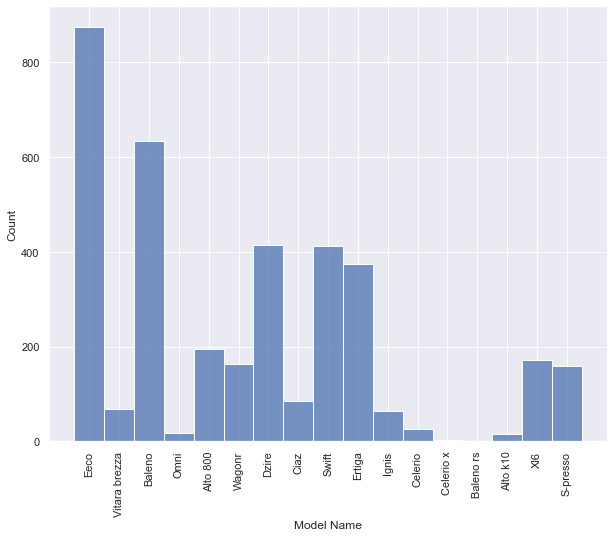

In [42]:
plt.figure(figsize=(10,8))

sns.histplot(merged_df['Model Name'],bins=merged_df['Model Name'].nunique())
plt.xticks(rotation='vertical')

plt.plot()

In [43]:
monthly_count_df.head()

,Year,Month,Invoice Num
0,2019,4,102
1,2019,5,108
2,2019,6,107
3,2019,7,84
4,2019,8,95


<Figure size 720x576 with 0 Axes>

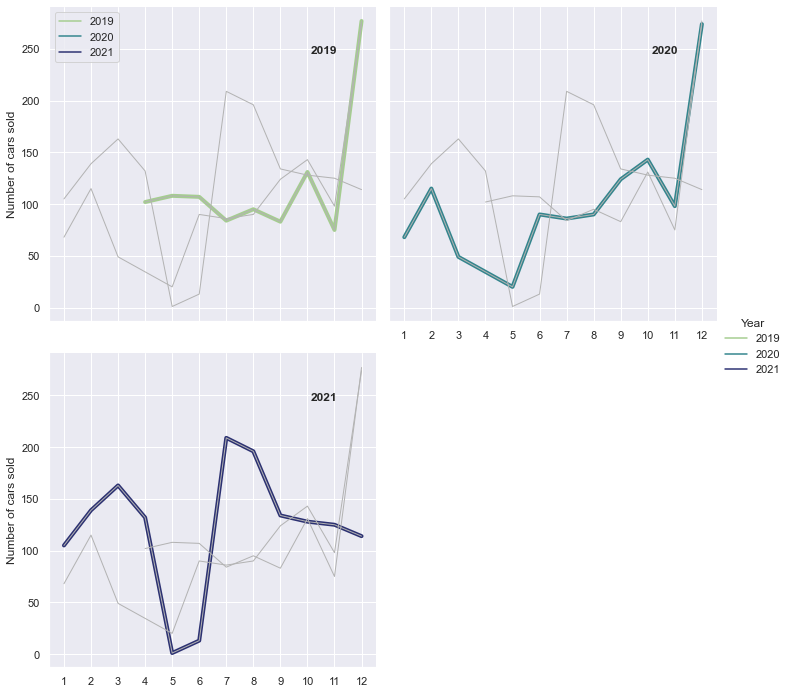

In [44]:
sns.set_theme(style="dark")

plt.figure(figsize=(10,8))


# Plot each year's time series in its own facet
g = sns.relplot(
    data=monthly_count_df,
    x="Month", y="Invoice Num", col="Year", hue="Year",
    kind="line", palette="crest",linewidth=4,col_wrap=2
)


# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():
    ax.grid()

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=monthly_count_df, x="Month", y="Invoice Num", units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

ax.set_xticks(range(1,13))


# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Number of cars sold")


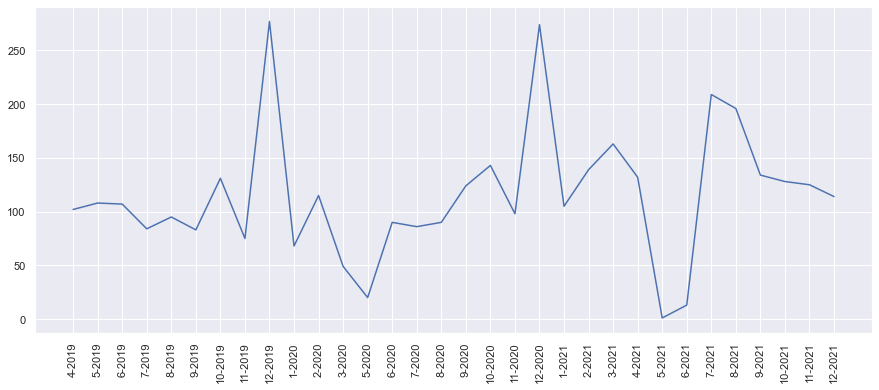

In [72]:
plt.figure(figsize=(15,6))
plt.plot(monthly_count_df['month-year'], monthly_count_df['Invoice Num'])
plt.grid()
plt.xticks(rotation='vertical')

plt.show()

In [74]:
merged_df.columns

Index(['Region', 'Dealer Name', 'Invoice Date', 'Invoice Num', 'Status',
       'Model Name', 'Fuel', 'Variant Name', 'Color', 'Variant Name sales df',
       'Variant Name car details df', 'Make', 'Model', 'Variant',
       'Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder',
       'Drivetrain', 'Emission_Norm', 'Engine_Location', 'Fuel_Tank_Capacity',
       'Fuel_Type', 'Height', 'Length', 'Width', 'Body_Type', 'Doors',
       'Front_Brakes', 'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension',
       'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer',
       'Seating_Capacity', 'Seats_Material', 'Type', 'Cup_Holders',
       'Fuel_Gauge', 'Instrument_Console', 'Power PS', 'PS RPM', 'Torque Nm',
       'Nm RPM', 'Year', 'Month'],
      dtype='object')

In [84]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = merged_df.select_dtypes(include=numerics)

<AxesSubplot:>

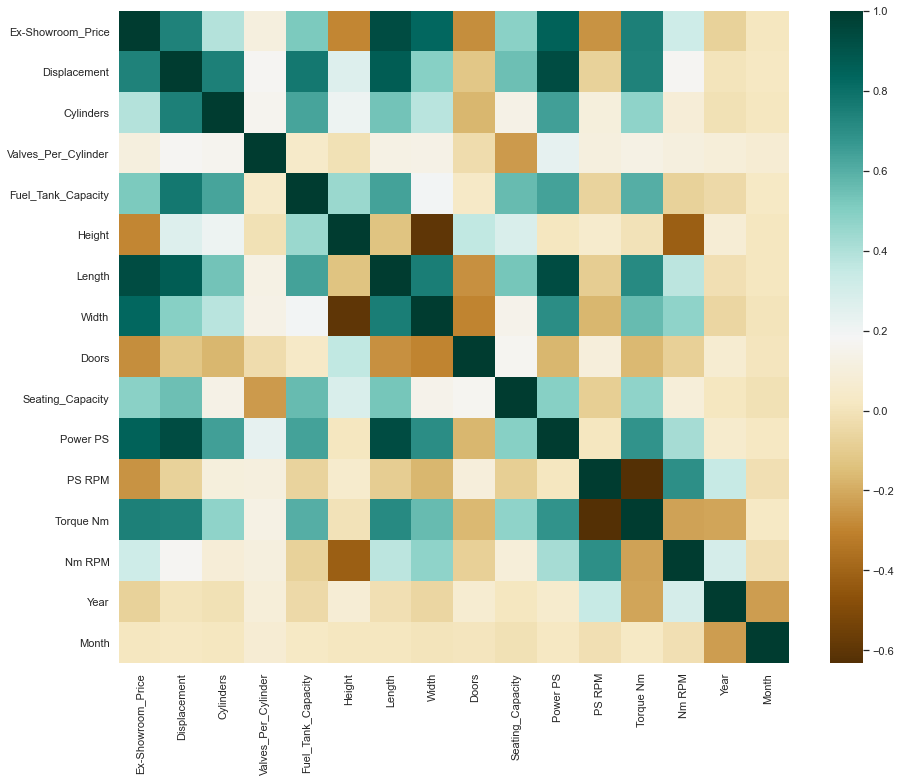

In [102]:
plt.figure(figsize=(15,12))

sns.heatmap(numeric_df.corr(), cmap="BrBG")